In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Data/Selenium/Data.csv')

In [3]:
df.head()

,Player,Tackles,Inter,Clear,Blocks,SpG,KeyP,Drb,Fouled,PS%,...,LongB,ThrB,CF,WF,AM,WM,CM,DM,FB,CB
0,Kevin De Bruyne Man City,0.9,0.2,0.4,0.1,2.2,3.2,1.0,0.8,79.5,...,2.5,0.4,1,0,0,1,1,0,0,0
1,Kieran Trippier Newcastle,2.0,1.3,1.9,0.4,0.4,2.9,0.5,0.9,74.7,...,3.4,0.2,0,0,0,1,0,0,1,0
2,Gabriel Jesus Arsenal,1.2,0.5,0.5,0.1,3.3,1.4,2.0,2.4,82.3,...,0.5,0.1,1,1,0,0,0,0,0,0
3,Erling Haaland Man City,0.1,0.1,0.4,0.1,3.5,0.8,0.2,0.7,75.6,...,0.0,0.1,1,0,0,0,0,0,0,0
4,Harry Kane Tottenham,0.3,0.1,0.4,0.2,3.6,1.5,1.2,1.4,72.2,...,1.9,0.2,1,0,1,0,0,0,0,0


In [4]:
X = df.iloc[:, 1:13]

In [5]:
y = df.iloc[:, 13:]

In [6]:
X.head()

,Tackles,Inter,Clear,Blocks,SpG,KeyP,Drb,Fouled,PS%,Crosses,LongB,ThrB
0,0.9,0.2,0.4,0.1,2.2,3.2,1.0,0.8,79.5,2.2,2.5,0.4
1,2.0,1.3,1.9,0.4,0.4,2.9,0.5,0.9,74.7,3.8,3.4,0.2
2,1.2,0.5,0.5,0.1,3.3,1.4,2.0,2.4,82.3,0.1,0.5,0.1
3,0.1,0.1,0.4,0.1,3.5,0.8,0.2,0.7,75.6,0.0,0.0,0.1
4,0.3,0.1,0.4,0.2,3.6,1.5,1.2,1.4,72.2,0.2,1.9,0.2


In [7]:
y.head()

,CF,WF,AM,WM,CM,DM,FB,CB
0,1,0,0,1,1,0,0,0
1,0,0,0,1,0,0,1,0
2,1,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0


In [8]:
for i in range(y.shape[1]):
    print("Label {}: {} samples".format(i, sum(y.iloc[:, i])))

Label 0: 415 samples
Label 1: 292 samples
Label 2: 219 samples
Label 3: 436 samples
Label 4: 326 samples
Label 5: 179 samples
Label 6: 387 samples
Label 7: 370 samples


# Normalization

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()

In [11]:
X = scaler.fit_transform(X)

# Reorder

In [12]:
order = ['CB', 'CF', 'CM', 'DM', 'AM', 'WM', 'FB', 'WF']

In [13]:
y_reordered = y[order].to_numpy()

# Train/Test split

In [14]:
from skmultilearn.model_selection import iterative_train_test_split

In [15]:
X_train, y_train, X_test, y_test = iterative_train_test_split(X, y_reordered, test_size=0.3)

# Classification

In [16]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score, hamming_loss
from sklearn.metrics import precision_recall_curve

In [17]:
clf = ClassifierChain(RandomForestClassifier())

In [18]:
clf.fit(X_train, y_train)

ClassifierChain(classifier=RandomForestClassifier(), require_dense=[True, True])

In [19]:
y_pred = clf.predict(X_test).toarray()
y_proba = clf.predict_proba(X_test).toarray()

In [20]:
hamming_loss(y_test, y_pred)

0.14982876712328766

In [21]:
average_precision_score(y_test, y_proba)

0.6650421966069999

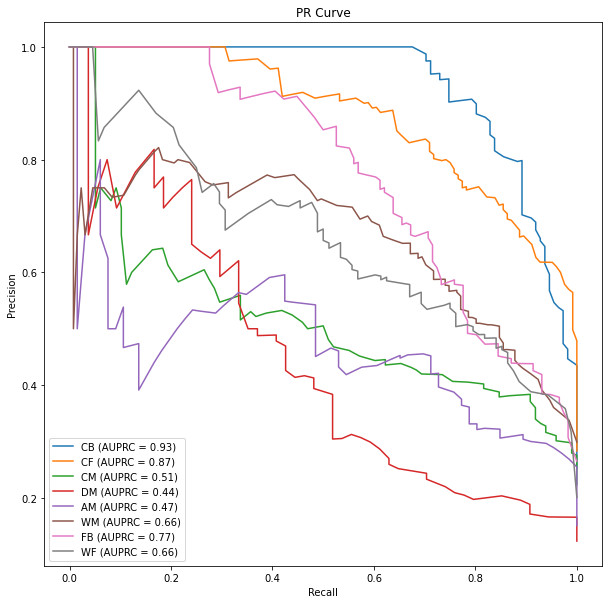

In [22]:
precision = [0 for i in range(8)]
recall = [0 for i in range(8)]
ap = [0 for i in range(8)]
for i in range(8):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_proba[:, i])
    ap[i] = average_precision_score(y_test[:, i], y_proba[:, i])
        
plt.figure(figsize=(10,10))
for i in range(8):
    plt.plot(recall[i], precision[i], label=f"{order[i]} (AUPRC = {ap[i]:.2f})")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title("PR Curve")
plt.legend(loc="lower left")
plt.show()